# Task 4: Optimize Portfolio Based on Forecast

In [1]:
# Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import os
import sys

# Add the parent directory to sys.path
sys.path.append(os.path.abspath('../scripts'))


## Importing my functions from my module

In [3]:
from optimize_portfolio import load_data,calculate_daily_returns,convert_forecasted_returns,portfolio_performance,neg_sharpe_ratio,optimize_portfolio,plot_portfolio_allocation,backtest_portfolio

## Define the assets and time range

In [ ]:
assets = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-12-31'

## Load historical financial data using YFinance for the specified assets.

In [ ]:
data = load_data(assets, start_date, end_date)

[*********************100%***********************]  3 of 3 completed


## Calculate Daily Returns and Forecasted annual returns

In [ ]:
returns = calculate_daily_returns(data)

forecasted_returns = {
    'TSLA': 0.15,  
    'BND': 0.03,   
    'SPY': 0.10    
}

## Convert forecasted annual returns to daily returns

In [ ]:

forecasted_daily_returns = convert_forecasted_returns(forecasted_returns)

## Calculate Covariance Matrix of Daily Returns

In [ ]:

cov_matrix = returns.cov()

# Perform Optimization

In [ ]:

optimal_weights = optimize_portfolio(assets, forecasted_daily_returns, cov_matrix)

## Print Optimal Weights

In [ ]:

print("Optimal Portfolio Weights:")
for asset, weight in zip(assets, optimal_weights):
    print(f"{asset}: {weight:.2%}")

Optimal Portfolio Weights:
TSLA: 99.96%
BND: 0.00%
SPY: 0.04%


## Calculate Portfolio Metrics

In [ ]:

p_return, p_volatility = portfolio_performance(optimal_weights, list(forecasted_daily_returns.values()), cov_matrix)
sharpe_ratio = (p_return - 0.02) / p_volatility  # Risk-free rate of 2%

print(f"\nOptimized Portfolio Performance:")
print(f"Expected Annual Return: {p_return:.2%}")
print(f"Annual Volatility (Risk): {p_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Optimized Portfolio Performance:
Expected Annual Return: 13.98%
Annual Volatility (Risk): 5.45%
Sharpe Ratio: 2.20


## Plot Portfolio Allocation

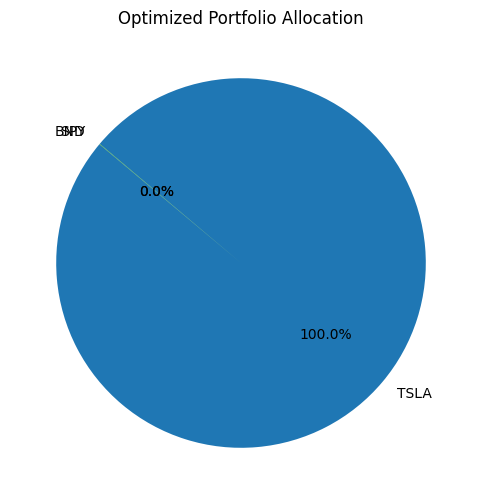

In [ ]:

plot_portfolio_allocation(optimal_weights, assets)

## Backtest Portfolio Performance

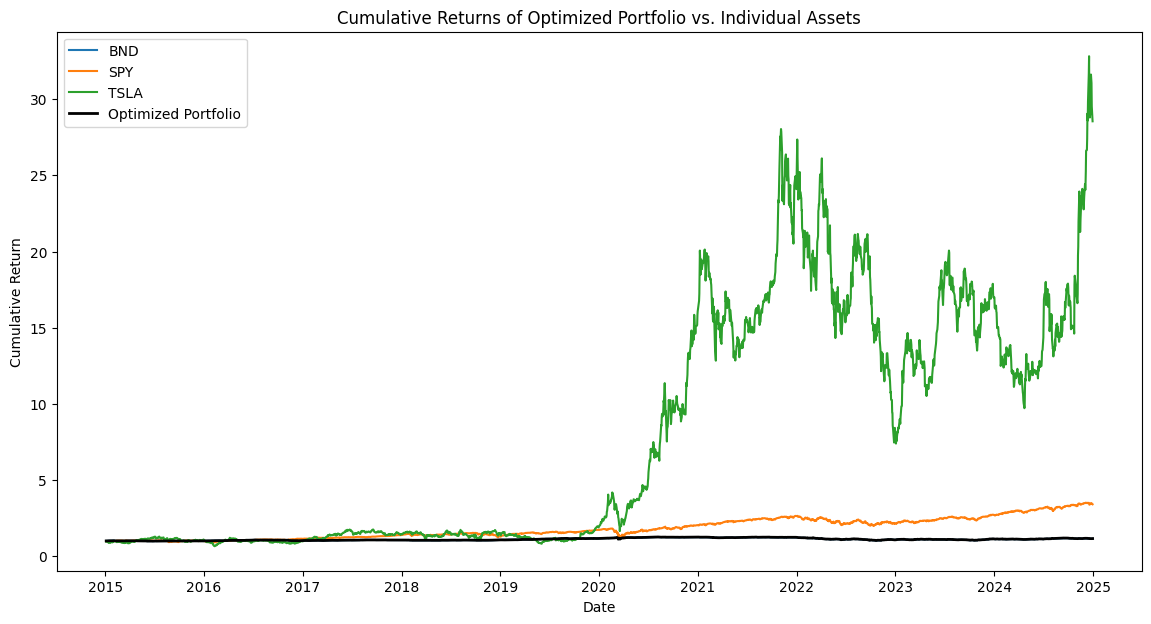

In [ ]:

backtest_portfolio(returns, optimal_weights)